# Central Limit Theorem

Central Limit Theorem states that given a sufficiently large sample size from a population with a finite level of variance, the distribution of the means from all samples from the same population will be approximately equal to the mean of the population.

The Central Limit Theorem is exactly what the shape of the distribution of means will be when we draw repeated samples from a given population. Specifically, as the sample sizes get larger, the distribution of means calculated from repeated sampling will approach normality.

A simple example to illustate this comes from the mean of samples from a uniformly distributed dataset.

In [1]:
#numpy is a python library that allows to perform numeric operations with high efficiency
#in this case we will use it to generate an array of random numbers, and do some simple descriptive statistics
import numpy as np

Let's define some quantities beforehand.

In [36]:
datasize = 10000 # size of our data set
samplesize = 10 # samples size
samplenumber = 1000 # number of samples

In [37]:
data = np.random.uniform(low=-1,high=1,size=datasize)
print(data[1:10]) # check the fist 10 values of data

[ 0.97963316  0.80999605  0.12448242  0.92258385  0.5861073  -0.97932721
 -0.62321841 -0.21988505  0.09348959]


In [38]:
data.mean()

0.0027095985094650215

Text(0, 0.5, 'Frequency')

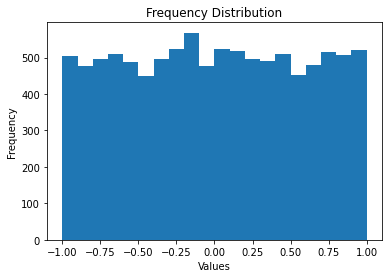

In [39]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.hist(data,bins=20, range=(-1,1))
plt.title('Frequency Distribution')
plt.xlabel('Values')
plt.ylabel('Frequency')

In [40]:
#here we use np.random.choice(x,size=10) to generate a sample of size 10 from our list of observations data
#from each sample we compute the mean with np.mean()
sampleAverages = [np.mean(np.random.choice(data,size=samplesize)) for i in range(samplenumber)]
print(sampleAverages[1:10]) ## checks the first 10 values in SampleAverages

[0.007749775917624158, 0.12109697575850357, -0.1008230327716094, 0.02454535203240842, -0.09296048241649608, -0.010498904677113296, -0.10706115474050171, -0.06023613478675789, -0.5754891689050755]


Text(0, 0.5, 'Frequency')

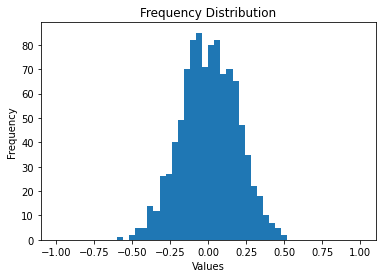

In [41]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.hist(sampleAverages, bins=50, range=(-1,1))
plt.title('Frequency Distribution')
plt.xlabel('Values')
plt.ylabel('Frequency')

Contrary to our initial distribution, the distribution of the averages of the samples is bell shaped.
Next let us fit this to a Normal Distribution and see the average and standard deviations.

In [42]:
from scipy.stats import norm
mu, std = norm.fit(sampleAverages)

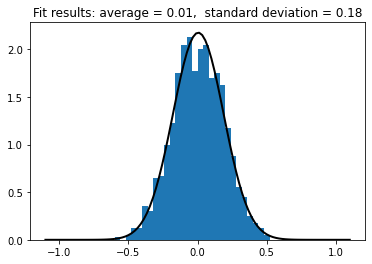

In [43]:
plt.hist(sampleAverages, bins=50, range=(-1,1),density=True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: average = %.2f,  standard deviation = %.2f" % (mu, std)
plt.title(title)

plt.show()

Try to change the value of the sample size (tip change the value of variable <b>samplesize</b> in the second input cell above) and the number of samples tip change the value of variable <b>samplenumber</b> in the second input cell above) , and rerun the above cells, what differencs do you see? How does the standard deviation change with different values of the sample size?

## When CLT fails

As mentioned above, the Central Limit Theorem is only valid if your underlying distribution from which you are sampling observations has finite variance. A classical example of a distribution that fails to meet this criteria is the Cauchy Distribution.

Let us take a dataset whose observations are distributed according to a Cauchy distribution (more info at https://en.wikipedia.org/wiki/Cauchy_distribution), if we repeat the steps above you will see that the distribution of averages does not fit a gaussian distribution, hence CLT is broken. This example highlight the importance of being critical about the properties of our underlying data.

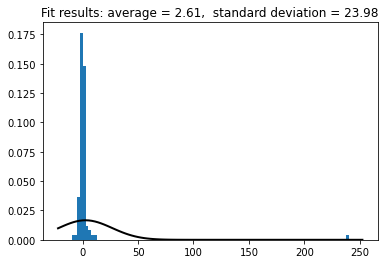

In [44]:
datasize = 10000
samplesize = 50
samplenumber = 100

data = np.random.standard_cauchy(size=datasize)
sampleAverages = [np.mean(np.random.choice(data,size=samplesize)) for i in range(samplenumber)]

mu, std = norm.fit(sampleAverages)

plt.hist(sampleAverages, bins=100,density=True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: average = %.2f,  standard deviation = %.2f" % (mu, std)
plt.title(title)

plt.show()

# Hypothesis Testing



Hypothesis testing is the use of statistics to determine the probability that a given hypothesis is true. The usual process of hypothesis testing consists of four steps:

1. Formulate the null hypothesis $H_0$ (commonly, that the observations are the result of pure chance) and the alternative hypothesis $H_a$ (commonly, that the observations show a real effect combined with a component of chance variation);
2. Identify a test statistic that can be used to assess the truth of the null hypothesis.
3. Compute the P-value, which is the probability that a test statistic at least as significant as the one observed would be obtained assuming that the null hypothesis were true. The smaller the P-value, the stronger the evidence against the null hypothesis.
4. Compare the $p$-value to an acceptable significance value  alpha (sometimes called an alpha value). If $p \leq alpha$, that the observed effect is statistically significant, the null hypothesis is ruled out, and the alternative hypothesis is valid.

One of the simplest, yet most used, statistical tests is the t-test, which tests whether two normally distribution populations have the same distribution, that is, if they both have the same mean and standard deviation.

## The t-test

The t-test is any statistical hypothesis test in which the test statistic follows a Student's t-distribution under the null hypothesis. One common application is to find whether two normally distributed populations have the same distribution (i.e., mean and standard deviation). Sounds confusing?  Let's break it down.

Suppose you want to find the true mean of a population, but you are limited to perform a small number of observations, so how dos your guess deviate from the true mean of the population?

Let's say that you have a sample of size $n$, and that $\bar{X}$ is the mean of of your sample.

\begin{equation}
    \bar{X} = \frac{\sum_i^n X_i}{n}
\end{equation}

Then the expected deviation from the true mean of the population ($\mu$) is called the $t$-value and is given by

\begin{equation}
    t = \frac{\bar{X} - \mu}{s \sqrt{n}}
\end{equation}

where $s$ is the sample variance and is computed as

\begin{equation}
    s = \frac{1}{n-1}\sum_i^n (X_i - \bar{X})^2
\end{equation}

note that here we compute the sample variance with $\nu = n-1$ degrees of freedom. Hence, $t$ follows the student distribution that is given by

\begin{equation}
    p(t | \nu ) = \frac{\Gamma(\frac{\nu+1}{2})}{\sqrt{\pi \nu} \Gamma(\frac{\nu}{2})}(1+\frac{t^2}{\nu})^\frac{1-\nu}{2}
\end{equation}

where $\Gamma$ is the the gamma function. In the t-test the statistics is the $t$-value and the p-value is computed by analyzing its underlying distrbution, the Student-t distribution. 

Let's see an example. Consider a normally distributed population with mean $\mu = 0$ and standard deviation $\sigma = 1$. Lets look at how likely are different t-values (deviations from the true mean) from samples of different size $n$.

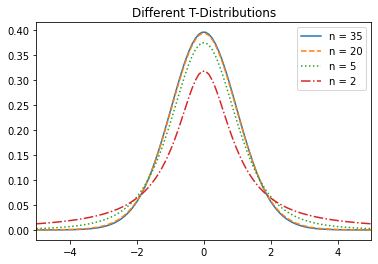

In [60]:
import numpy as np
from scipy.stats import t
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(-5,5,100)

plt.xlim(-5,5)
plt.plot(x,t.pdf(x, df=34, loc=0, scale=1),"-",label="n = 35")
plt.plot(x,t.pdf(x, df=19, loc=0, scale=1),"--",label="n = 20")
plt.plot(x,t.pdf(x, df=4, loc=0, scale=1),":",label="n = 5")
plt.plot(x,t.pdf(x, df=1, loc=0, scale=1),"-.",label="n = 2")
plt.legend()
plt.title("Different T-Distributions")
plt.show()

Hence, a <i>t-test</i> corresponds to the assessment of how likely is it that the mean of our sampled population will converge or not to that of an hypothesized scenario (null hypothesis). To that end we compute the p-value, which is the probability that given our experimental design we should expect to see an observation that favors the null hypothesis. In other words, the p-value answers the question: "If the null hypothesis is true, what is the probability that we'd observe a more extreme test statistic ($t$-value) in the direction of the alternative hypothesis than we did?"

In a nuttshell we are looking to compute the probabilities of all events that lie outside the interval defined by \[-t,t[ of the student t-distribution. The figure bellow illustrates this,

![title](figure1.png)

the x-axis depicts the t-statistics, and the curve illustrates the shape of the student t-distribution.
From Scipy stats module you can find a method $t$ to evalute the $t$-distribution. Check the documentation https://tinyurl.com/yc4xd2hb. The t-distribution has a bell shape, similar to the normal distribution, however values are less concentrated around the peak. The t-distribution arguments are the mean and the degrees of freedom ($\nu$).<br/>



The Scipy library already provides several methods that allow us to perform the t-test easily.

In [61]:
from scipy import stats

Let us create a sample dataset from a normal distribution with mean 0.05, a standard deviation of 0.25 and size 15.

In [62]:
rvs = stats.norm.rvs(
    loc=0.05, # defines the mean
    scale=0.25, # defines the standar deviation
    size=15 #defines the sample size
)

Now let us perform a one sample t-test to see how likely is that this sampled dataset was obtained from a normal distribution with mean 0.0 and standard deviation 1 (null hypothesis).

In [63]:
stats.ttest_1samp(rvs,popmean=0.0)

Ttest_1sampResult(statistic=-0.47699789654041336, pvalue=0.640723731868162)

The output, although not friendly, tell us that the p-value of this comparision is of 0.725. Meaning that there is a 72.5% chance that our sampled distribution was actually from to our null hypothesis. This is clearly wrong but serves to show how limitations in our experimental design can influence our ability to test different hypothesis.

Try to modify in the above cells sample size, the mean of our sampled distribution, and standard deviation and see how that influences the obtained p-value.

It is noteworthy to say that the t-test can be generalized to the comparison between the means of any two distributions, assuming that they are normally distributed. Hence you will be able to find t-test methods that either compare a sampled dataset to a specific population mean (one sample), or t-tests that compare two samples of data (two sample).

# Let's play with Data

During this week's class we will look at a dataset of

1. Load the required python libraries for our analysis

In [64]:
import pandas as pd

2. Load our data

In [65]:
data = pd.read_csv("weight-height.csv")

Data is now stored in variable <b>data</b>, and we can start explore it using Pandas.

3. Let us take a sneak peak at the top 10 records in our data set, so that we have a quick glimpse at the variables we are working with.

In [66]:
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


4. Next let us print a brief summary of data

In [67]:
data.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


Note that describe() will only print out results for numerical variables.
We also see that the Height is in inches and the weight is in pounds, we are not americans so let us transform this data to something more scientific (cm and kg)

In [68]:
data['Height'] = data['Height'].map(lambda x: x*2.54) # transforms inches to cm by multiplying each inch by 2.54

In [69]:
data['Weight'] = data['Weight'].map(lambda x: x*0.453592) # transforms pounds to kg

5. Now let us see how variable X is distributed.

We can achieve this by using the .plot() methods that come with pandas.

<AxesSubplot:ylabel='Frequency'>

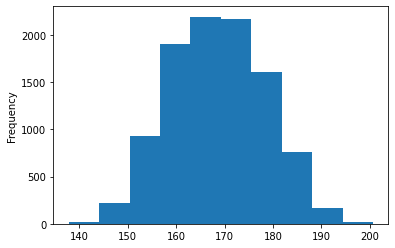

In [70]:
data['Height'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

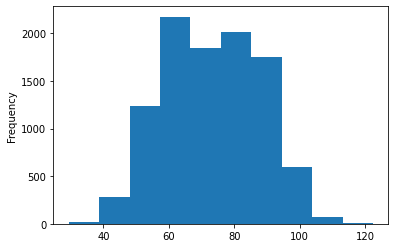

In [71]:
data['Weight'].plot(kind='hist')

6. Let us test whether the average weight of the Males is the same as the average Height of the Females. 

But first let's inspect how our data is distributed.

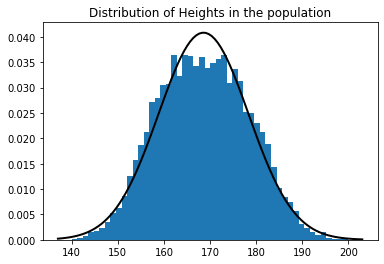

In [72]:
from scipy.stats import norm
mu, std = norm.fit(data['Height'].values)

plt.hist(data['Height'].values, range=(140,200), bins=50, density=True)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Distribution of Heights in the population"
plt.title(title)
plt.show()

We can use a qq-plot to check whether our data is indeed following a normal distribution.

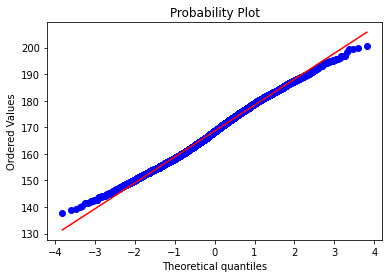

In [73]:

import numpy as np 
import pylab 
import scipy.stats as stats

stats.probplot(data['Height'].values, dist="norm", plot=pylab)
pylab.show()

As we can see it does look very promising.
To test our hypothesis we need to perform a t-test that will compare whether the mean heights of the two groups are statistically different, but before let us have a visual inspection of the two groups.

In [74]:
from scipy.stats import norm
muM, stdM = norm.fit(data[data['Gender']=="Male"]['Height'].values)
muF, stdF = norm.fit(data[data['Gender']=="Female"]['Height'].values)

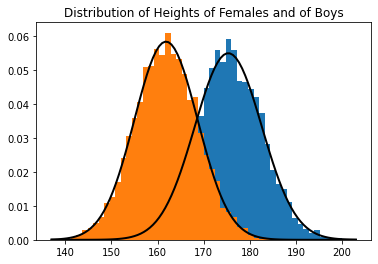

In [75]:
plt.hist(data[data['Gender']=="Male"]['Height'].values, range=(140,200), bins=50, density=True)
plt.hist(data[data['Gender']=="Female"]['Height'].values, range=(140,200), bins=50, density=True)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
pM = norm.pdf(x, muM, stdM)
pF = norm.pdf(x, muF, stdF)
plt.plot(x, pM, 'k', linewidth=2)
plt.plot(x, pF, 'k', linewidth=2)
title = "Distribution of Heights of Females and of Boys"
plt.title(title)

plt.show()

Let us now perform a t-test between the two groups and see whether there is a statistically significant difference in the weights between the two groups.

In [76]:
from scipy import stats
stats.ttest_ind(
    data[data['Gender']=="Male"]['Height'].values,
    data[data['Gender']=="Female"]['Height'].values,
    equal_var=False
)

Ttest_indResult(statistic=95.60271449148863, pvalue=0.0)

As we can see the output has a pvalue of zero, meaning that the null hypothesis that both populations follow the same distribution is not supported.

7. Finally, let us next inspect visually existing correlations between the different variables. We start by comparing variable X and Y.

The method .corr() allow us to see a summary table with all the correlations between our variables.

In [77]:
data.corr()

,Height,Weight
Height,1.000000,0.924756
Weight,0.924756,1.000000


We can also quickly inspect the validity of the correlations through the relationships that they represent visually. To that end we can use the Seaborn pairplot functionality. 

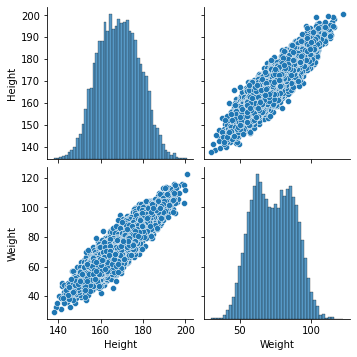

In [79]:
import seaborn as sns

sns.pairplot(data)

8. Let us save our new data file with the weight and height in the correct units

In [168]:
data.to_csv("weight-height-corrected.csv")

And we are done, Good Job!